# Lecture 16: Gallery of Wigner functions

Author: J.R. Johansson, robert@riken.jp, http://jrjohansson.github.io

Latest version of this ipython notebook lecture is available at: http://github.com/jrjohansson/qutip-lectures

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from qutip import *

## Introduction

## Parameters

In [8]:
N = 20

In [4]:
def plot_wigner_2d_3d(psi):
    #fig, axes = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(12, 6))
    fig = plt.figure(figsize=(17, 8))
    
    ax = fig.add_subplot(1, 2, 1)
    plot_wigner(psi, fig=fig, ax=ax, alpha_max=6);

    ax = fig.add_subplot(1, 2, 2, projection='3d')
    plot_wigner(psi, fig=fig, ax=ax, projection='3d', alpha_max=6);
    
    plt.close(fig)
    return fig

## Vacuum state: $\left|0\right>$

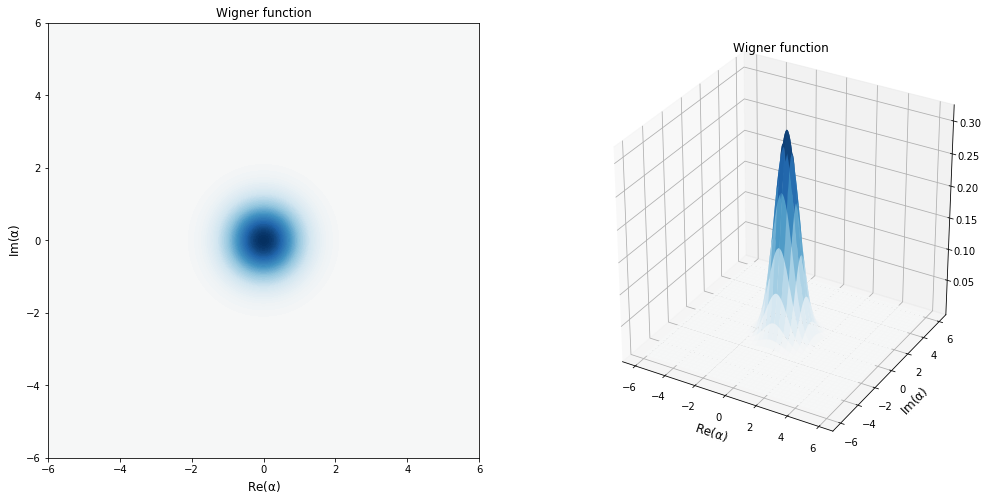

In [5]:
psi = basis(N, 0)
plot_wigner_2d_3d(psi)

## Thermal states

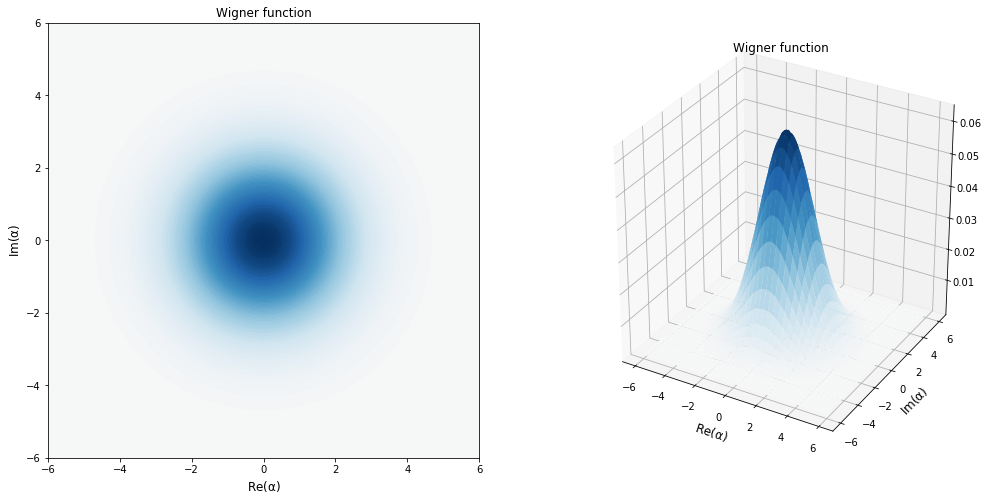

In [6]:
psi = thermal_dm(N, 2)
plot_wigner_2d_3d(psi)

## Coherent states: $\left|\alpha\right>$

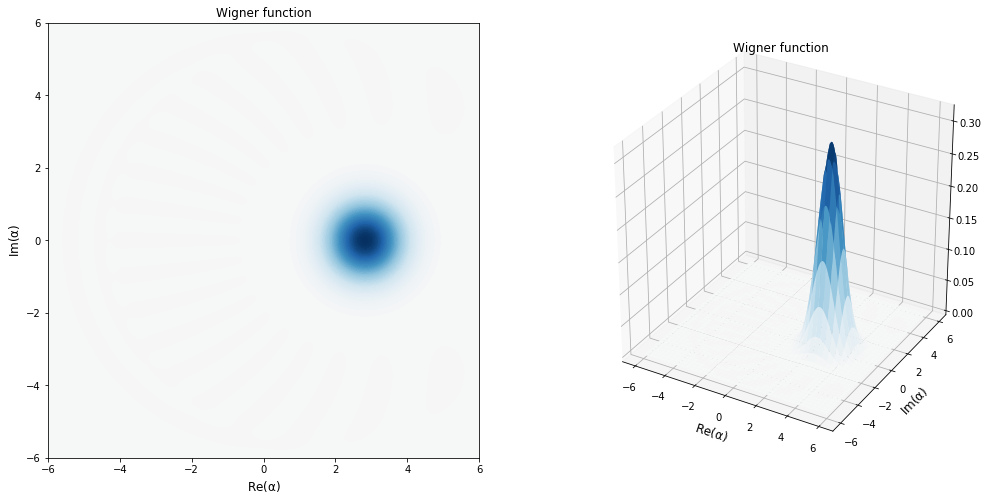

In [29]:
psi = coherent(N, 2.0)
plot_wigner_2d_3d(psi)

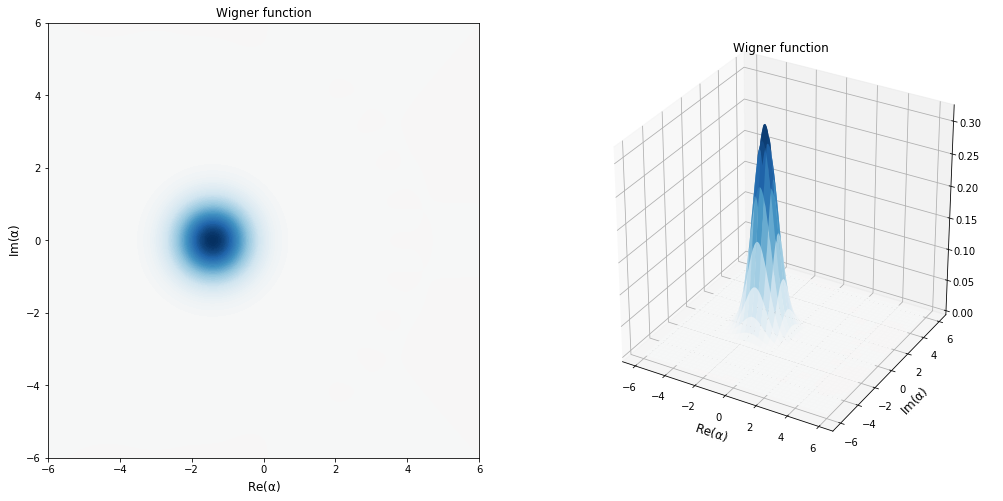

In [8]:
psi = coherent(N, -1.0)
plot_wigner_2d_3d(psi)

## Superposition of coherent states

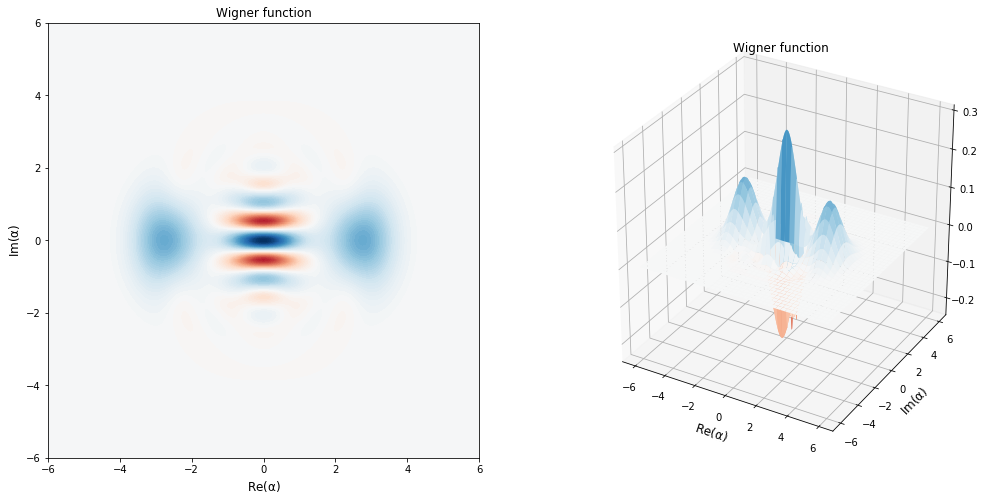

In [10]:
psi = (coherent(10, -2.0) + coherent(10, 2.0)) / np.sqrt(2)
plot_wigner_2d_3d(psi)

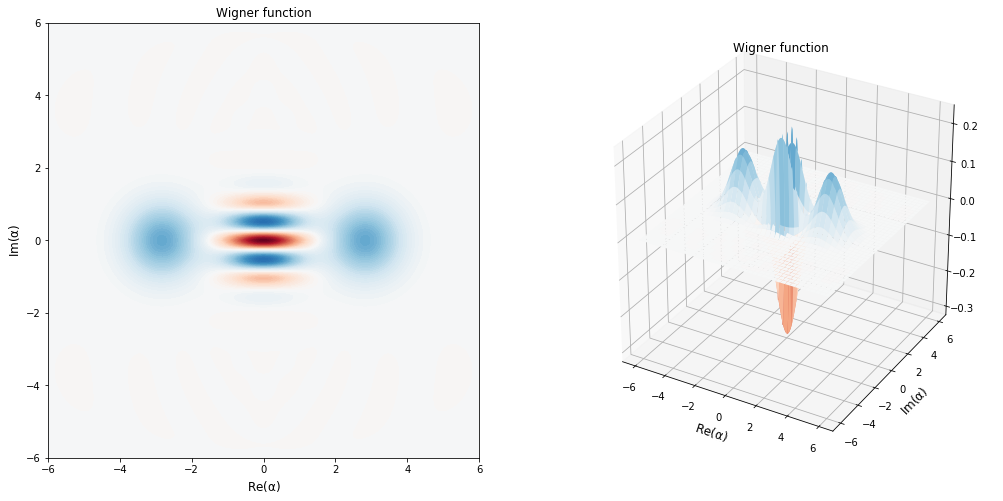

In [10]:
psi = (coherent(N, -2.0) - coherent(N, 2.0)) / np.sqrt(2)
plot_wigner_2d_3d(psi)

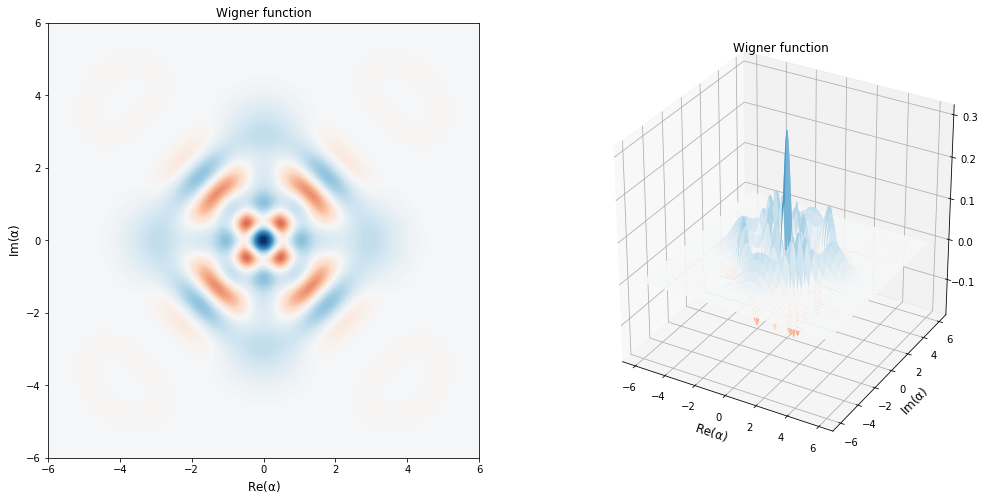

In [11]:
psi = (coherent(N, -2.0) + coherent(N, -2j) + coherent(N, 2j) + coherent(N, 2.0)).unit()
plot_wigner_2d_3d(psi)

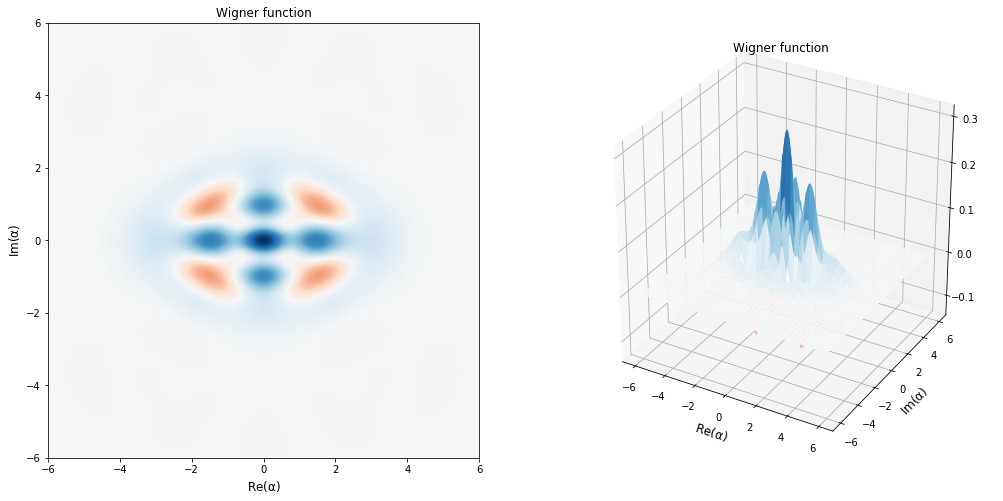

In [12]:
psi = (coherent(N, -2.0) + coherent(N, -1j) + coherent(N, 1j) + coherent(N, 2.0)).unit()
plot_wigner_2d_3d(psi)

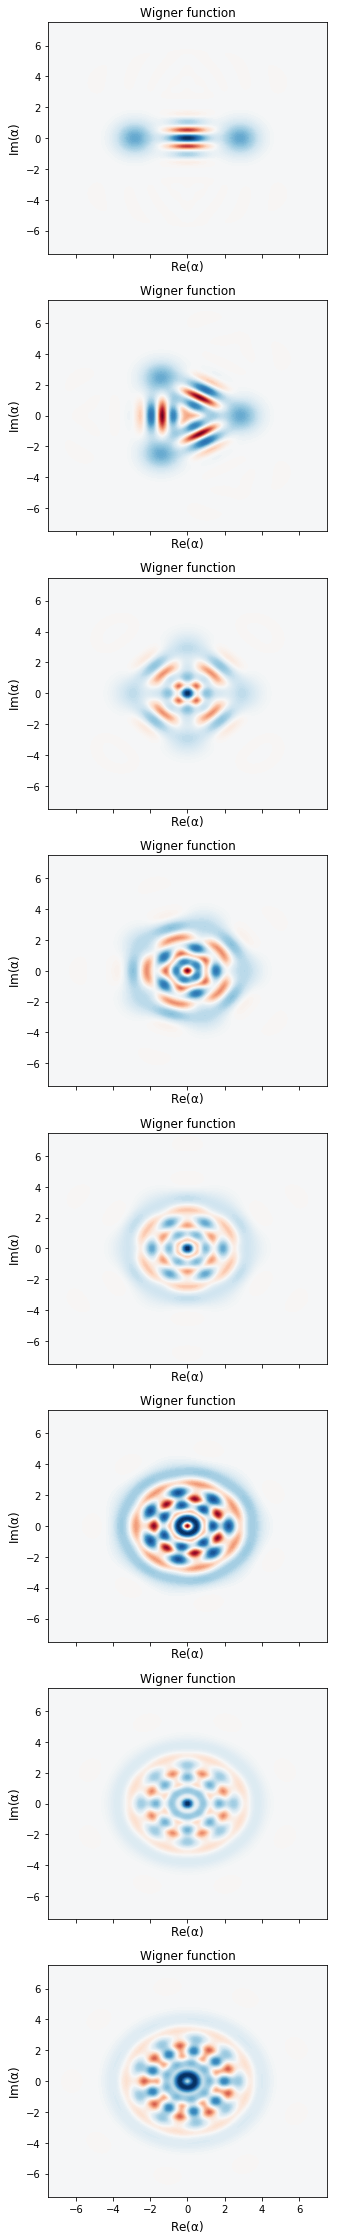

In [13]:
NN = 8

fig, axes = plt.subplots(NN, 1, figsize=(5, 5 * NN), sharex=True, sharey=True) 
for n in range(NN):
    psi = sum([coherent(N, 2*np.exp(2j * np.pi * m / (n + 2))) for m in range(n + 2)]).unit()
    plot_wigner(psi, fig=fig, ax=axes[n])

    #if n < NN - 1:
    #    axes[n].set_ylabel("")

### Mixture of coherent states

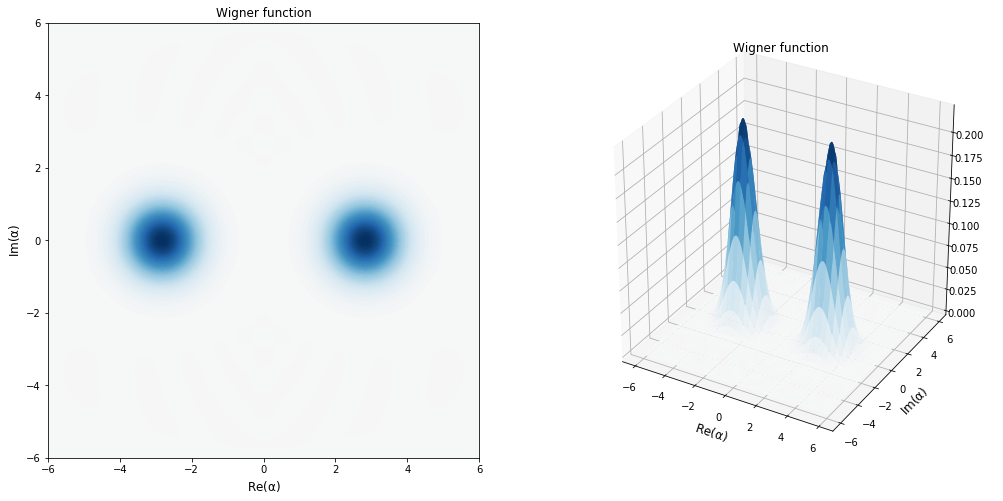

In [32]:
psi = (coherent_dm(N, -2.0) + coherent_dm(N, 2.0)) / np.sqrt(2)
plot_wigner_2d_3d(psi)

## Fock states: $\left|n\right>$

In [15]:
from IPython.display import display

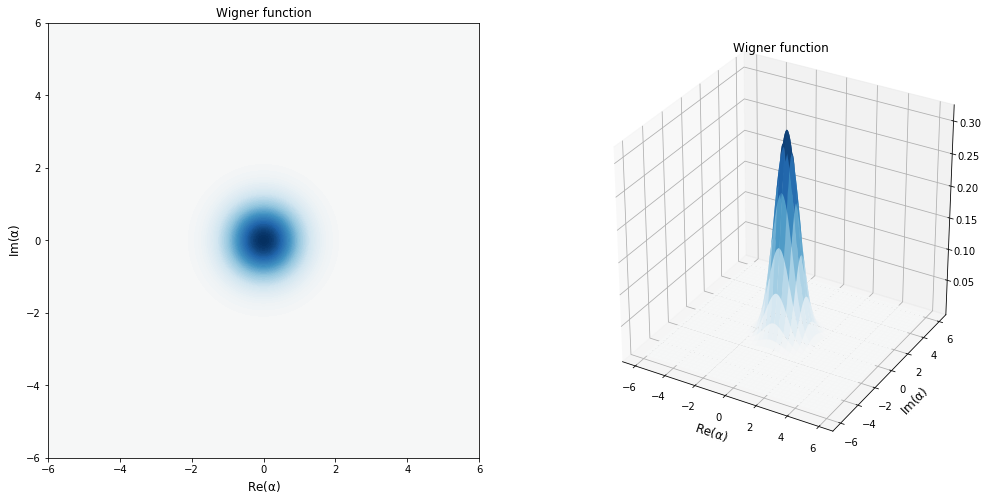

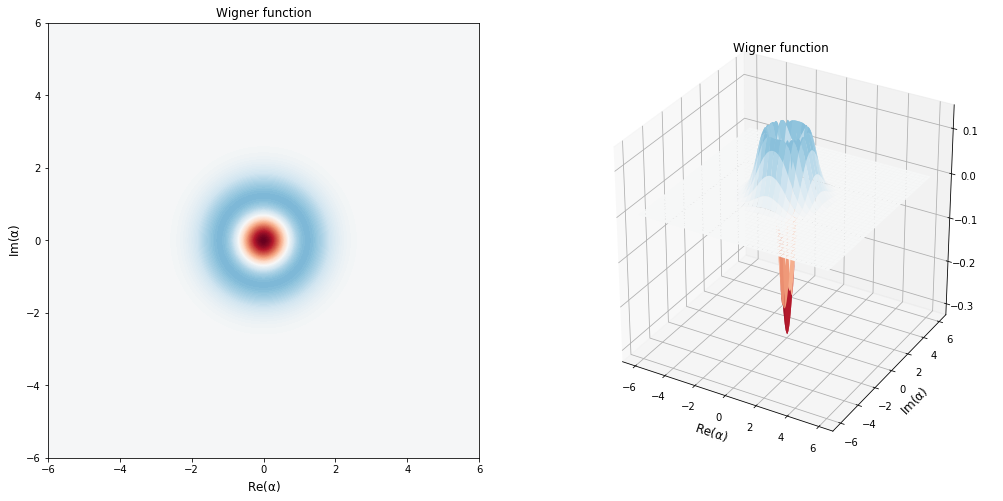

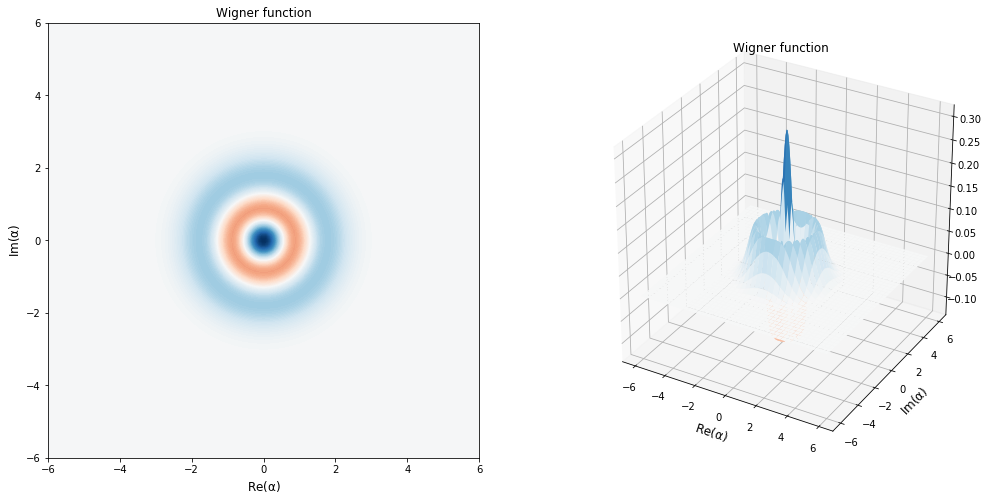

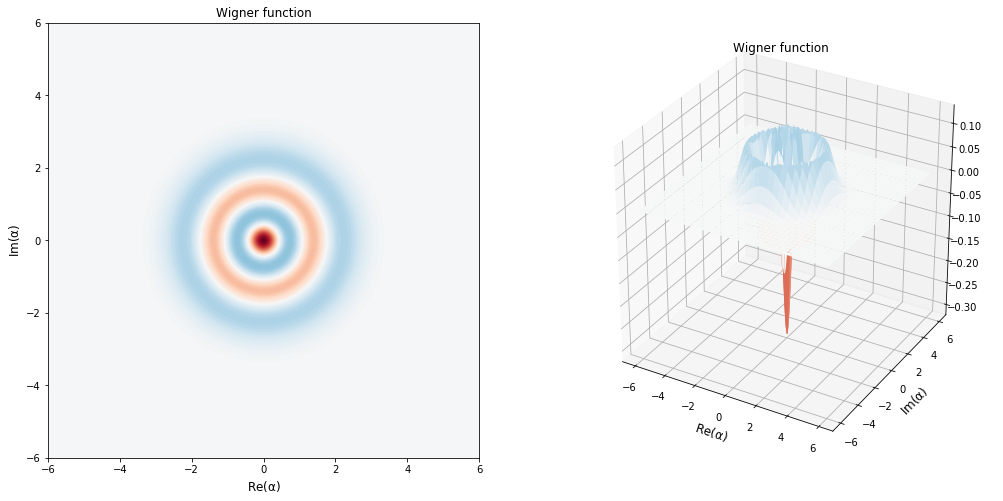

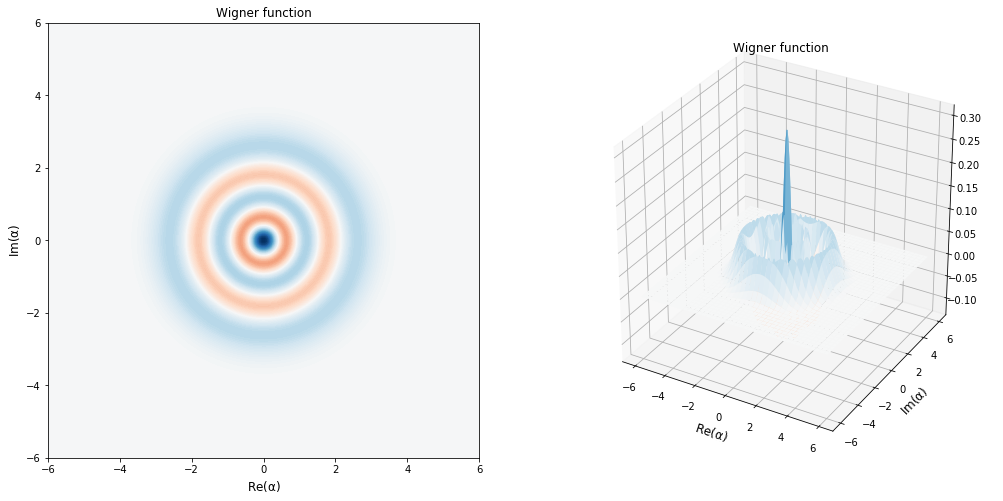

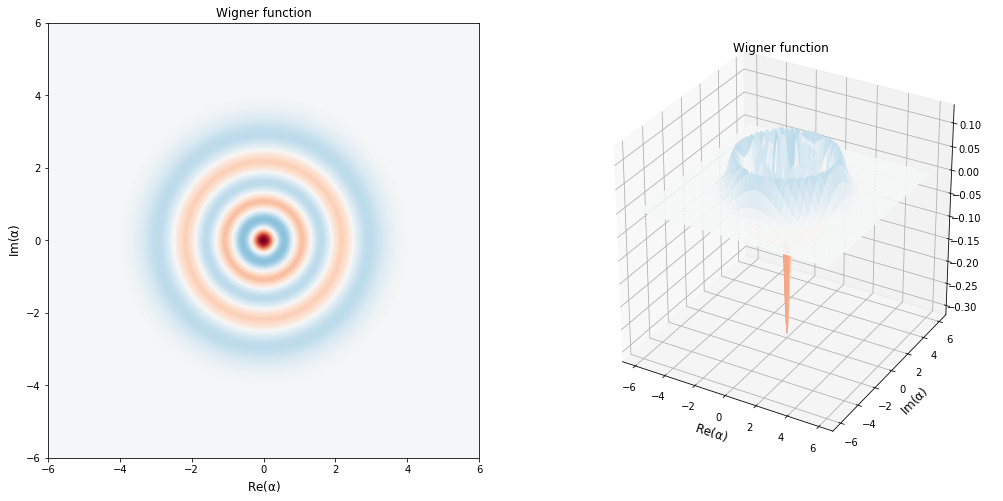

In [16]:
for n in range(6):
    psi = basis(N, n)
    display(plot_wigner_2d_3d(psi))

## Superposition of Fock states

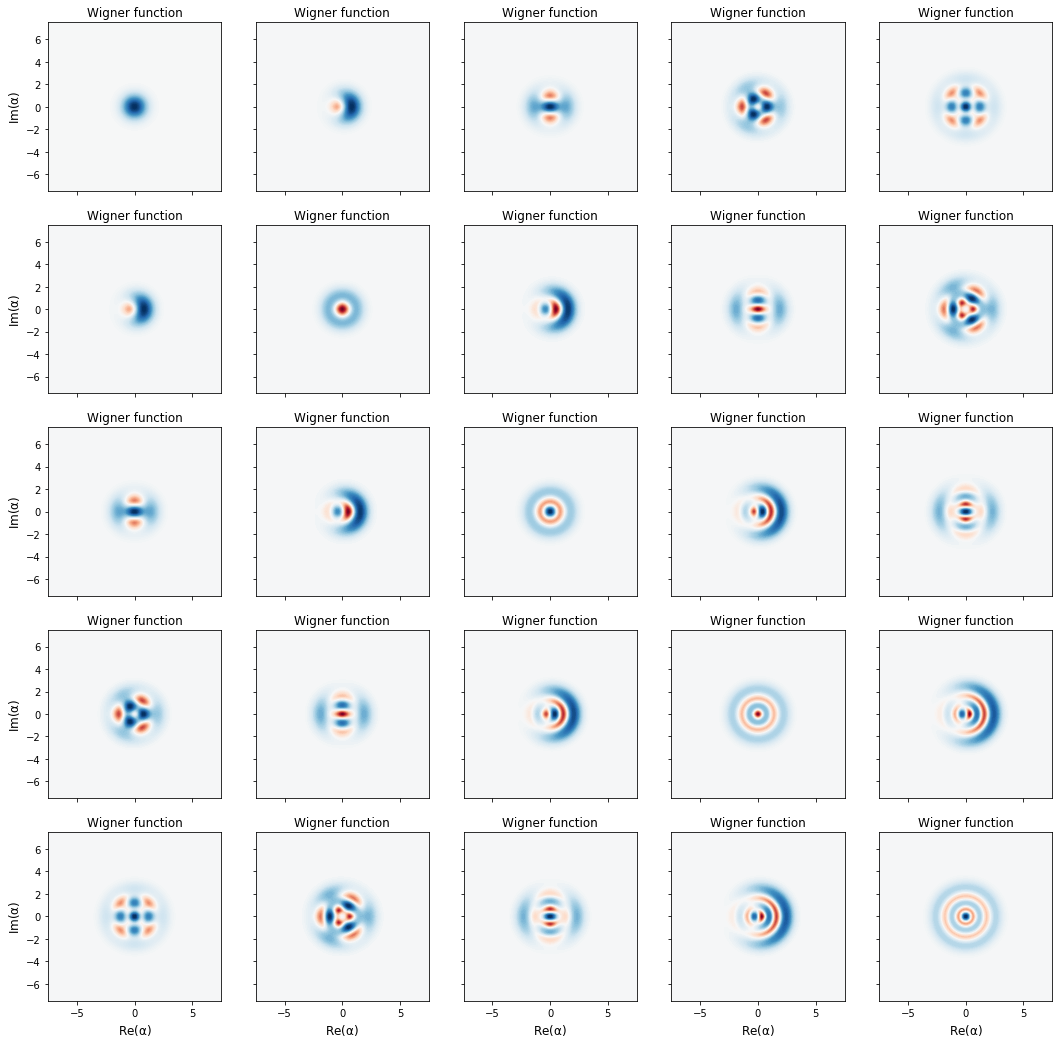

In [17]:
NN = MM = 5

fig, axes = plt.subplots(NN, MM, figsize=(18, 18), sharex=True, sharey=True) 
for n in range(NN):
    for m in range(MM):
        psi = (fock(N, n) + fock(N, m)).unit()
        plot_wigner(psi, fig=fig, ax=axes[n, m])
        #axes[n, m].set_title(r"$(\left|%d\right> + \left|%d\right>)/\sqrt{2}$" % (n, m))
        if n < NN - 1:
            axes[n, m].set_xlabel("")
        if m > 0:
            axes[n, m].set_ylabel("")

## Squeezed vacuum states

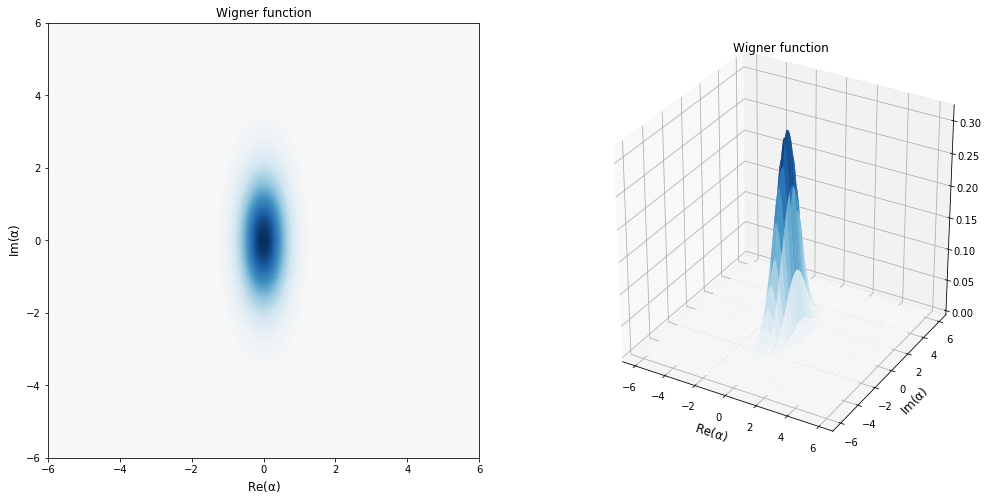

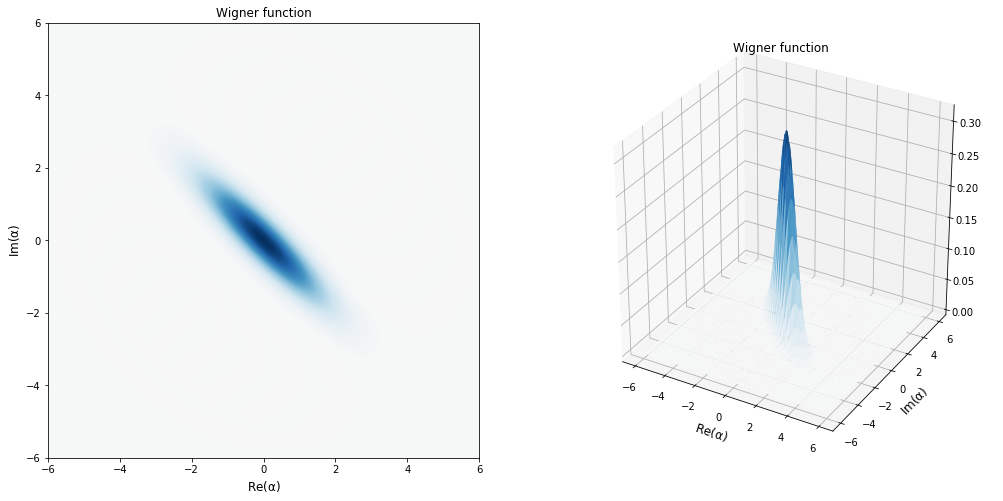

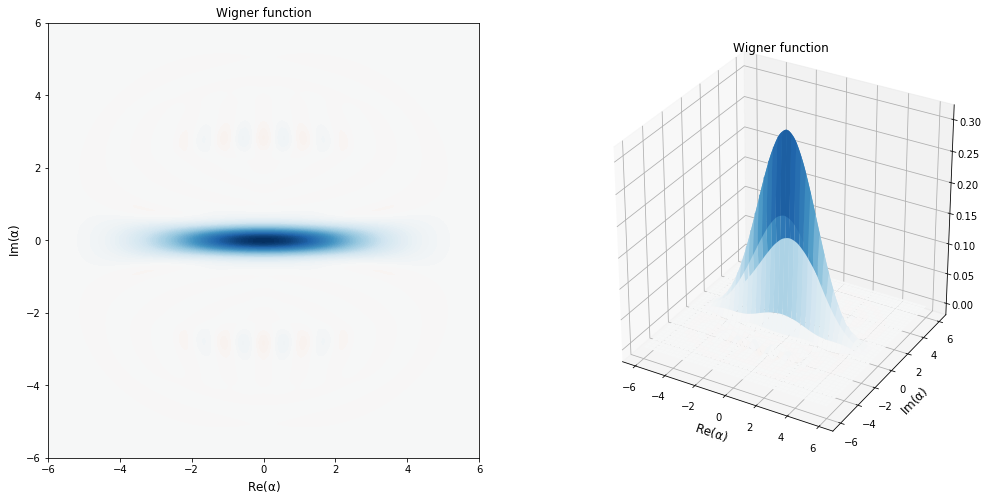

In [18]:
psi = squeeze(N, 0.5) * basis(N, 0)
display(plot_wigner_2d_3d(psi))

psi = squeeze(N, 0.75j) * basis(N, 0)
display(plot_wigner_2d_3d(psi))

psi = squeeze(N, -1) * basis(N, 0)
display(plot_wigner_2d_3d(psi))

### Superposition of squeezed vacuum

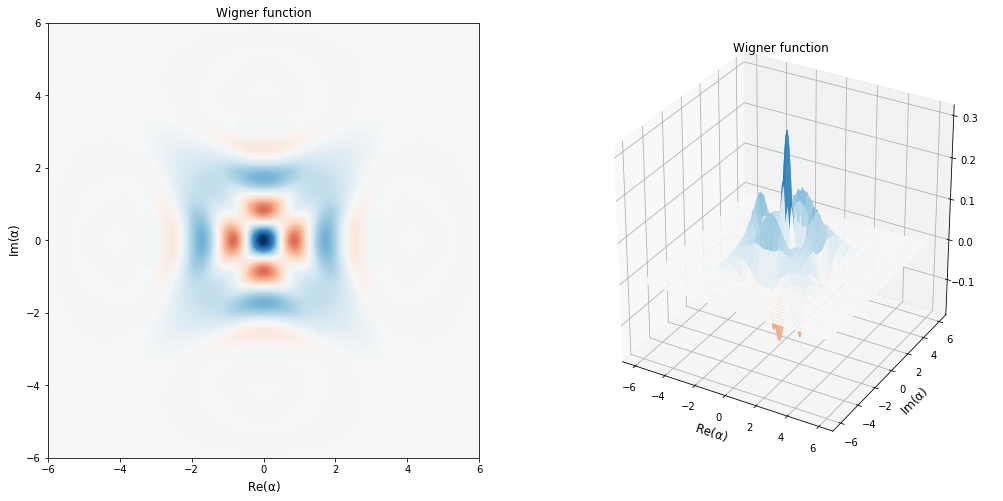

In [19]:
psi = (squeeze(N, 0.75j) * basis(N, 0) - squeeze(N, -0.75j) * basis(N, 0)).unit()
display(plot_wigner_2d_3d(psi))

### Mixture of squeezed vacuum

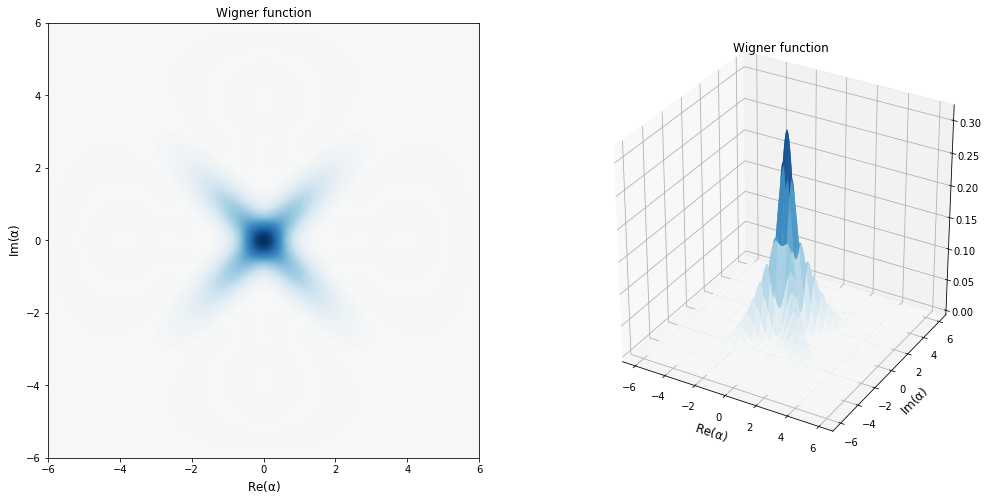

In [20]:
psi = (ket2dm(squeeze(N, 0.75j) * basis(N, 0)) + ket2dm(squeeze(N, -0.75j) * basis(N, 0))).unit()
display(plot_wigner_2d_3d(psi))

## Displaced squeezed vacuum

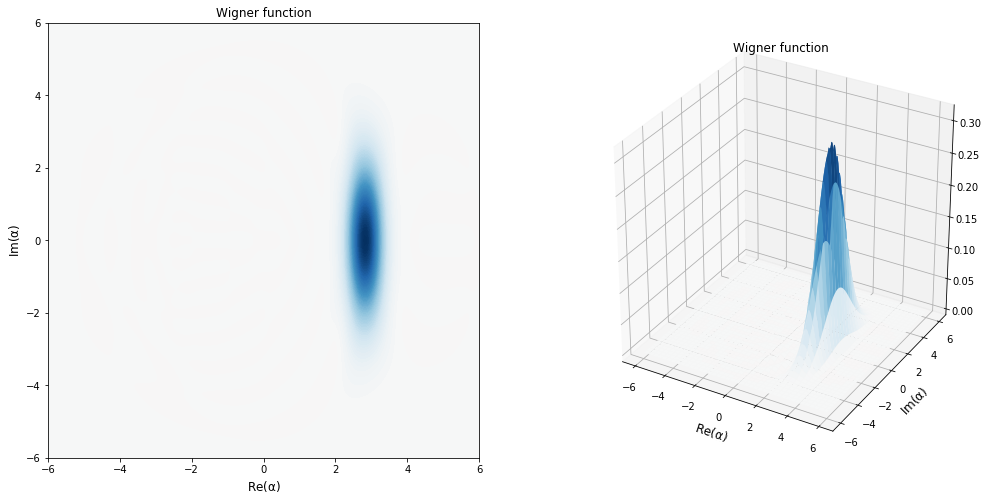

In [21]:
psi = displace(N, 2) * squeeze(N, 0.75) * basis(N, 0)
display(plot_wigner_2d_3d(psi))

### Superposition of two displaced squeezed states

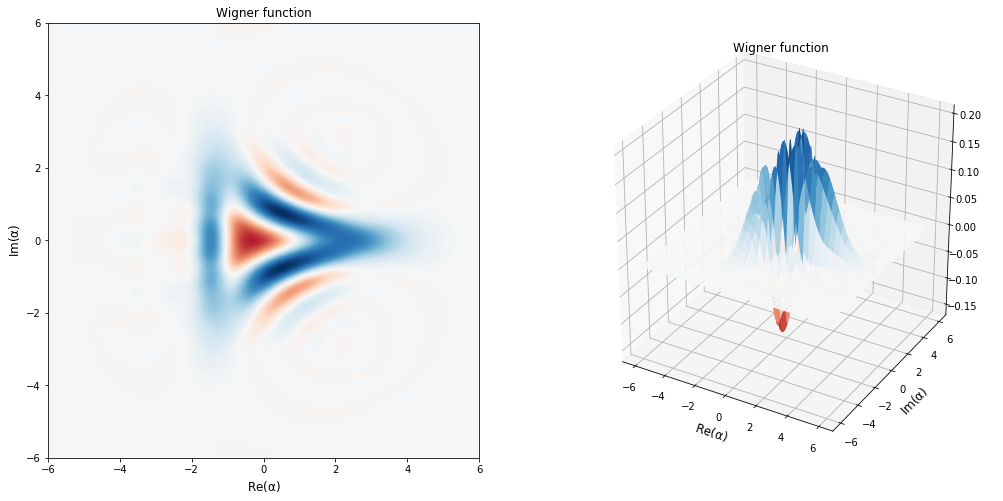

In [22]:
psi = (displace(N, -1) * squeeze(N, 0.75) * basis(N, 0) - displace(N, 1) * squeeze(N, -0.75) * basis(N, 0)).unit()
display(plot_wigner_2d_3d(psi))

## Versions

In [23]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.3.1
Numpy,1.16.0
SciPy,1.2.0
matplotlib,3.0.2
Cython,0.29.2
Number of CPUs,2
BLAS Info,OPENBLAS
IPython,6.4.0
Python,"3.6.7 (default, Oct 22 2018, 11:32:17) [GCC 8.2.0]"
OS,posix [linux]
